2025-04-10 21:15:36 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_looking5m_01.csv
2025-04-10 21:15:36 - INFO - CSV 파일 로딩 완료: 13910 행
2025-04-10 21:15:36 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:15:36 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:15:36 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:15:36 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:15:36 - INFO - ENU 좌표 변환 시작



학습에 사용된 파일 처리 중: Soccer_looking5m_01.csv


2025-04-10 21:16:00 - INFO - ENU 좌표 변환 완료
2025-04-10 21:16:00 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:16:00 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:16:00 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:16:00 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:00 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:00 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:00 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:00 - INFO - 전체 전처리 완료


9/9 [==============================] - 1s 7ms/step


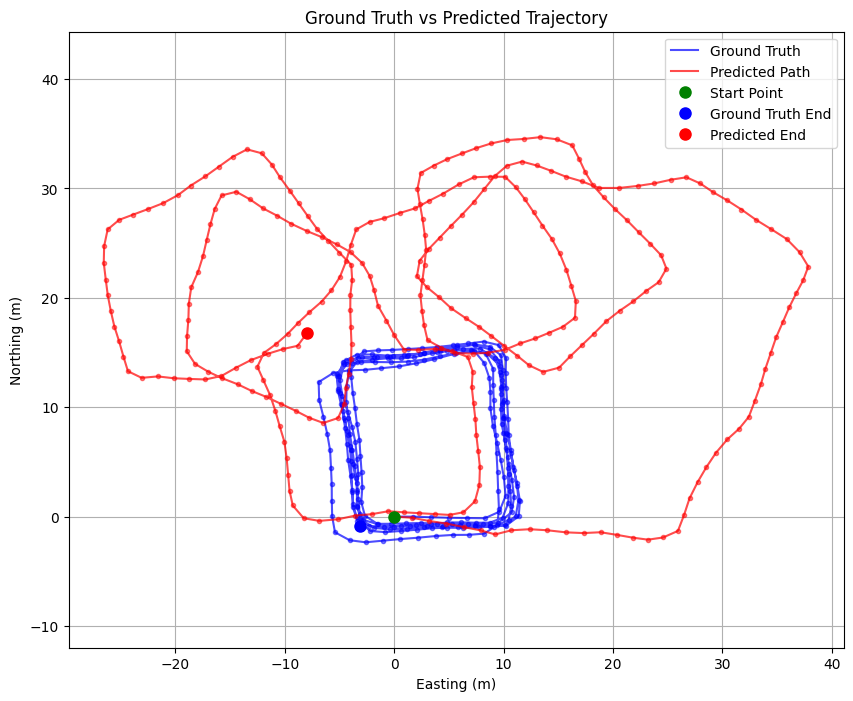

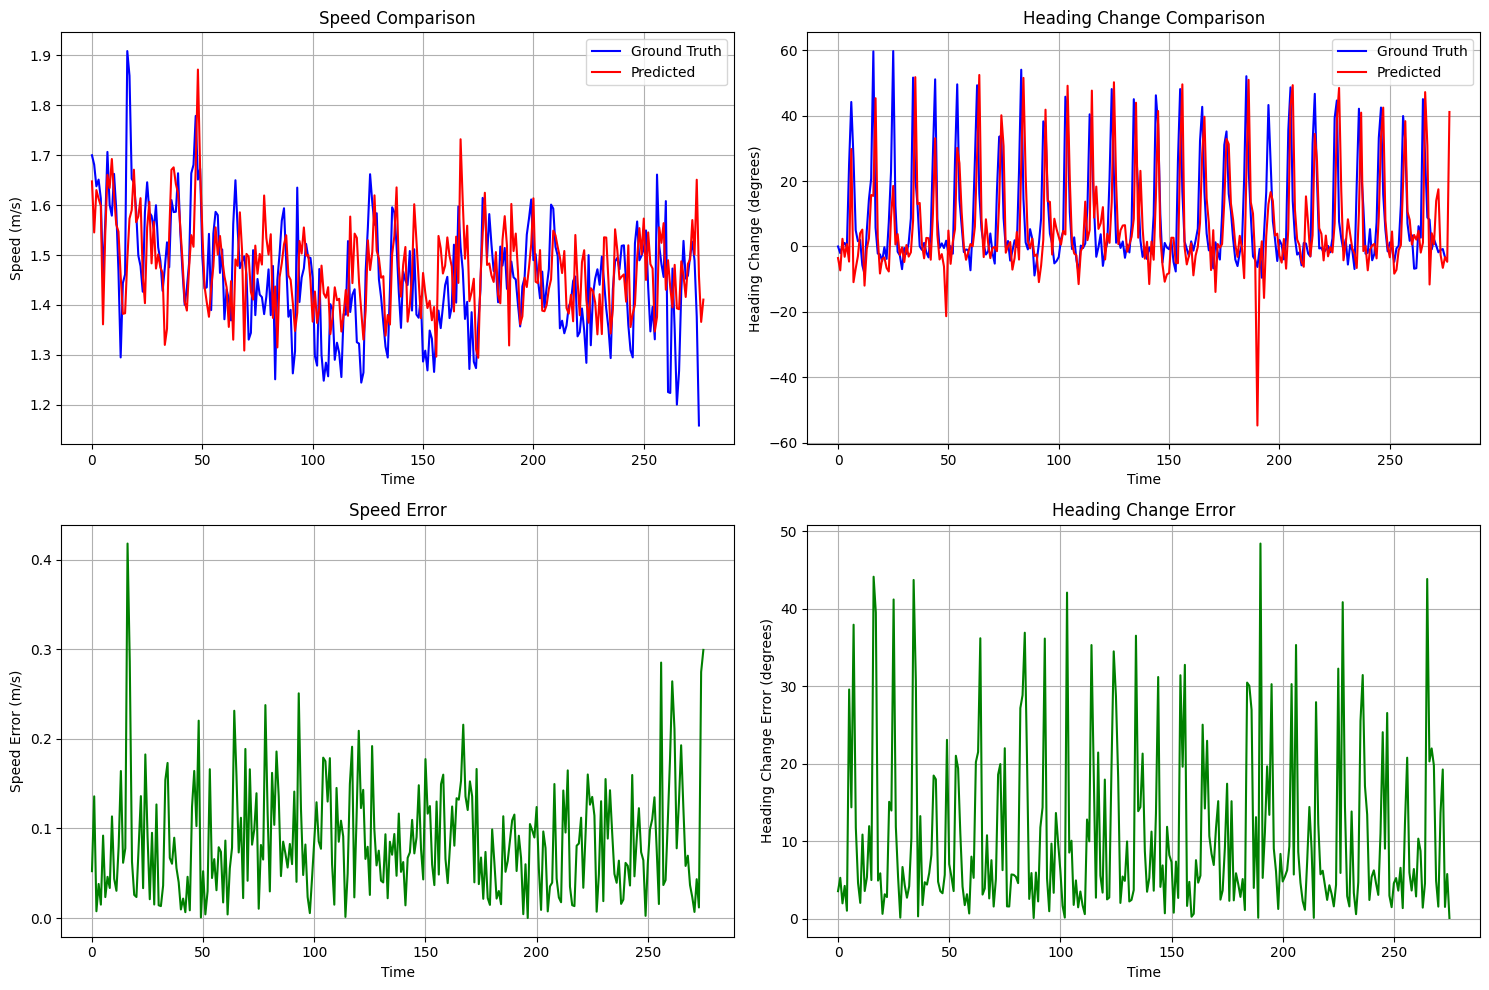

2025-04-10 21:16:02 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_looking5m_02.csv
2025-04-10 21:16:02 - INFO - CSV 파일 로딩 완료: 16091 행
2025-04-10 21:16:02 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:16:02 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:16:02 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:16:02 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:16:02 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.0869 m/s
Mean Heading Change Error: 10.7724 degrees

학습에 사용된 파일 처리 중: Soccer_looking5m_02.csv


2025-04-10 21:16:31 - INFO - ENU 좌표 변환 완료
2025-04-10 21:16:31 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:16:31 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:16:31 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:16:31 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:31 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:31 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:31 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:31 - INFO - 전체 전처리 완료


11/11 [==============================] - 0s 7ms/step


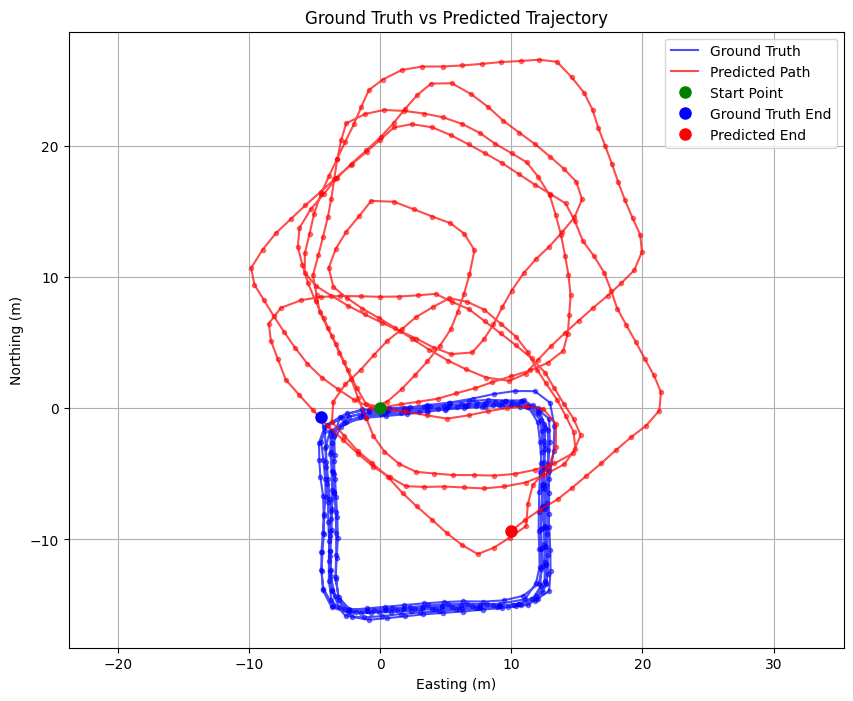

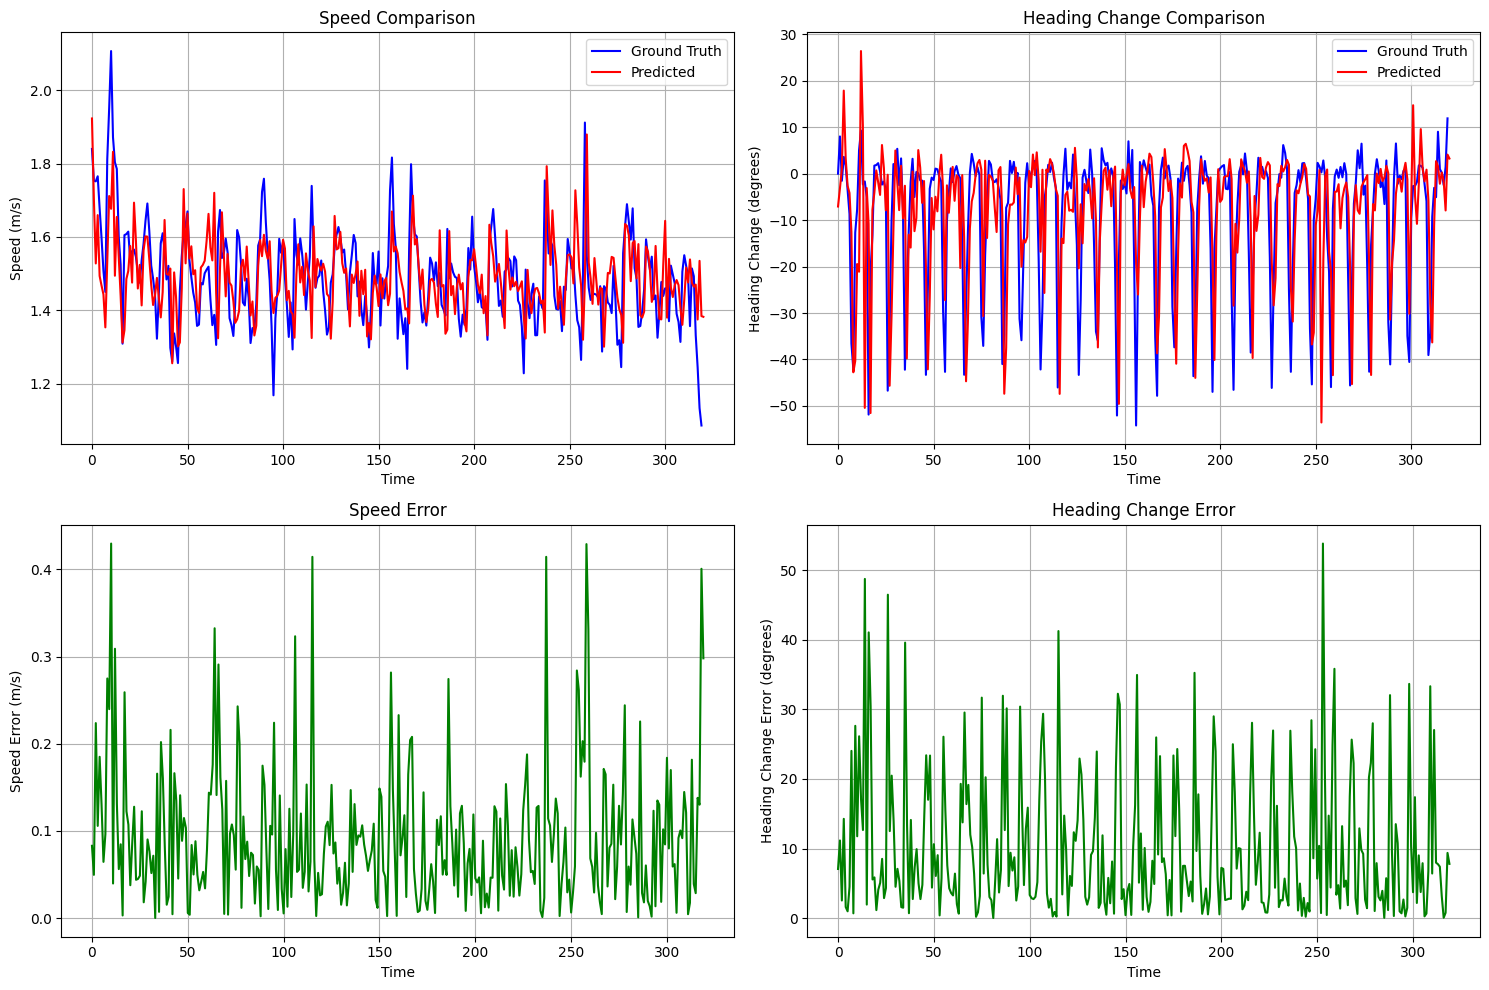

2025-04-10 21:16:32 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_looking5m_03.csv
2025-04-10 21:16:32 - INFO - CSV 파일 로딩 완료: 14786 행
2025-04-10 21:16:32 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:16:32 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:16:32 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:16:32 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:16:32 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.0926 m/s
Mean Heading Change Error: 10.0834 degrees

학습에 사용된 파일 처리 중: Soccer_looking5m_03.csv


2025-04-10 21:16:59 - INFO - ENU 좌표 변환 완료
2025-04-10 21:16:59 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:16:59 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:16:59 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:16:59 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:59 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:16:59 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:59 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:16:59 - INFO - 전체 전처리 완료


10/10 [==============================] - 0s 7ms/step


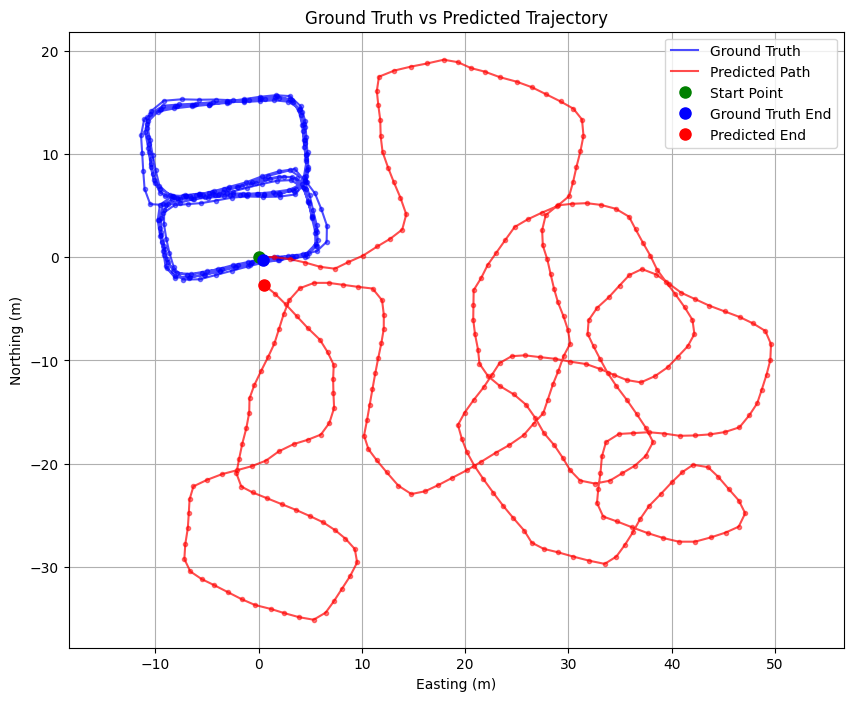

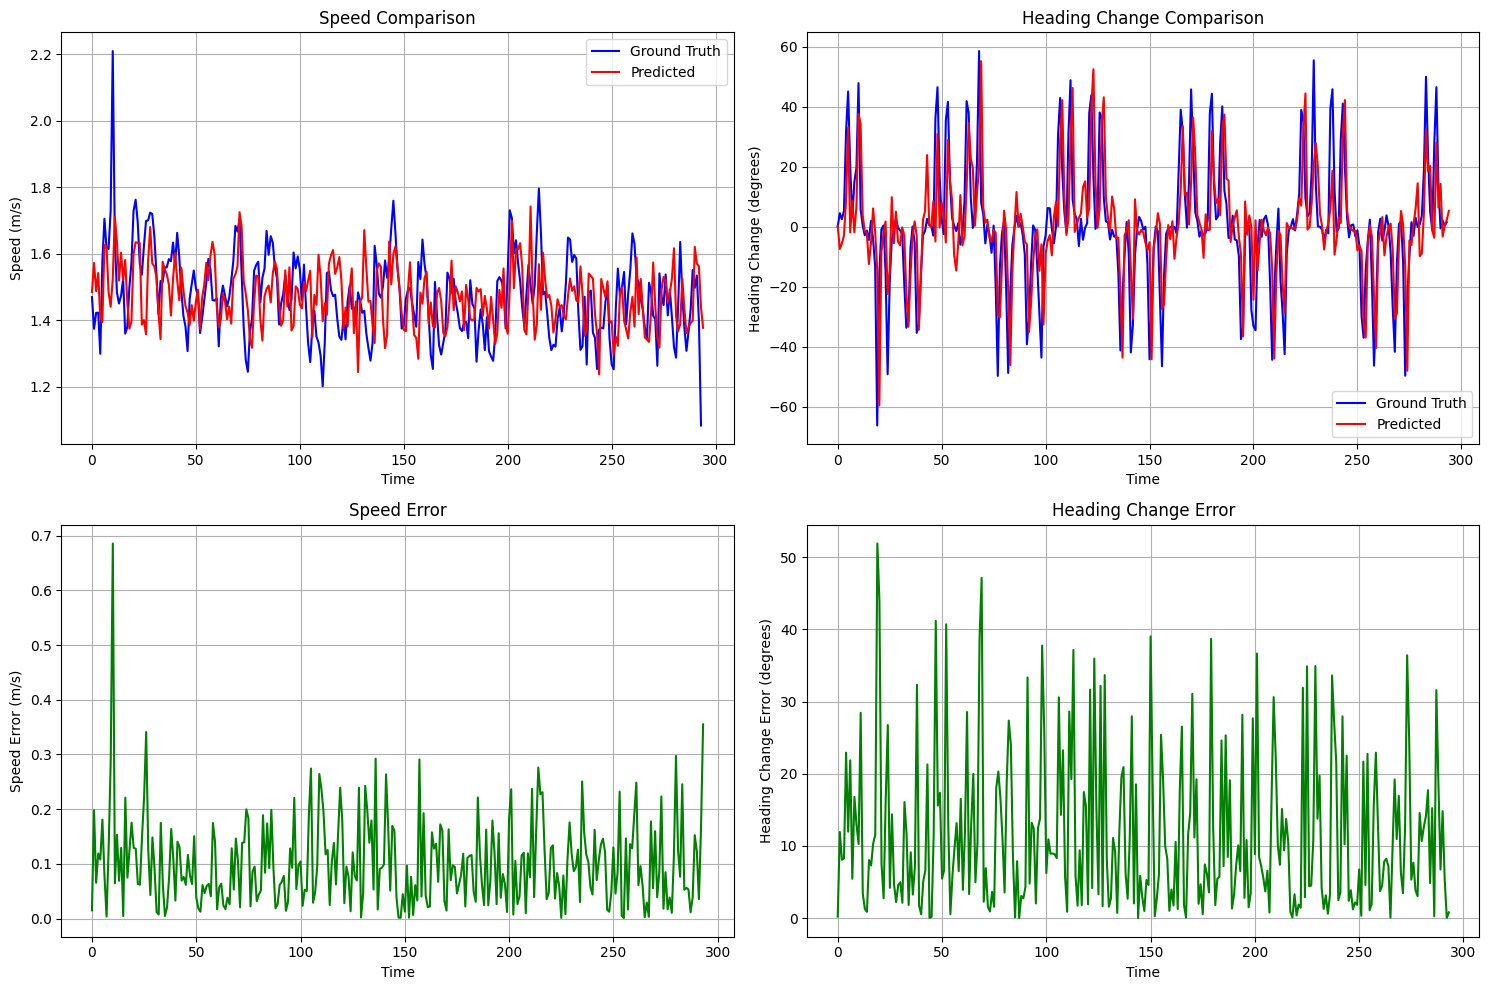

2025-04-10 21:16:59 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_swing5m_01.csv
2025-04-10 21:16:59 - INFO - CSV 파일 로딩 완료: 14662 행
2025-04-10 21:16:59 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:16:59 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:16:59 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:16:59 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:16:59 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.1014 m/s
Mean Heading Change Error: 11.5894 degrees

학습에 사용된 파일 처리 중: Soccer_swing5m_01.csv


2025-04-10 21:17:27 - INFO - ENU 좌표 변환 완료
2025-04-10 21:17:27 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:17:27 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:17:27 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:17:27 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:17:27 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:17:27 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:17:27 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:17:27 - INFO - 전체 전처리 완료


10/10 [==============================] - 0s 7ms/step


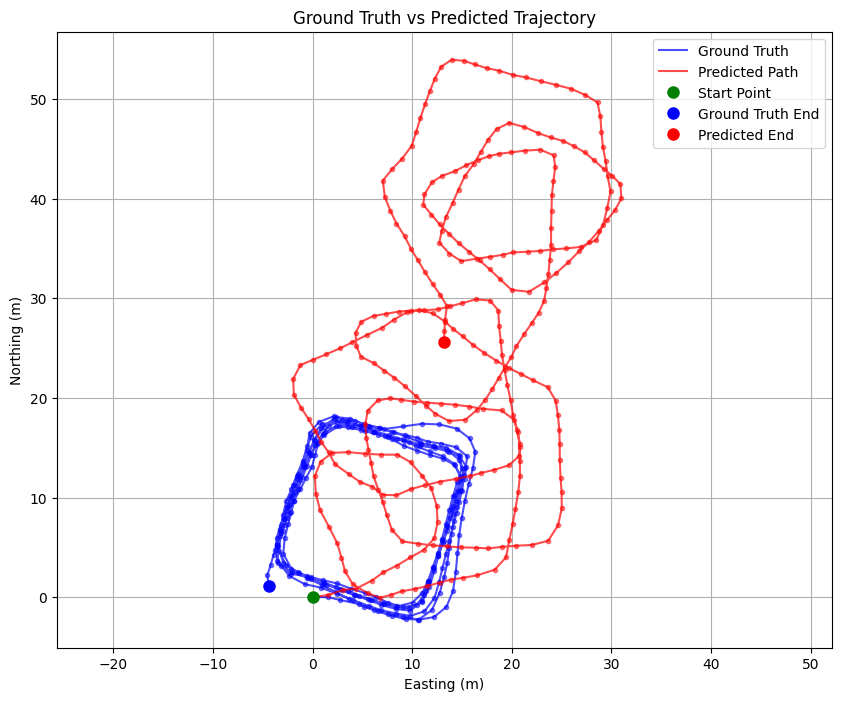

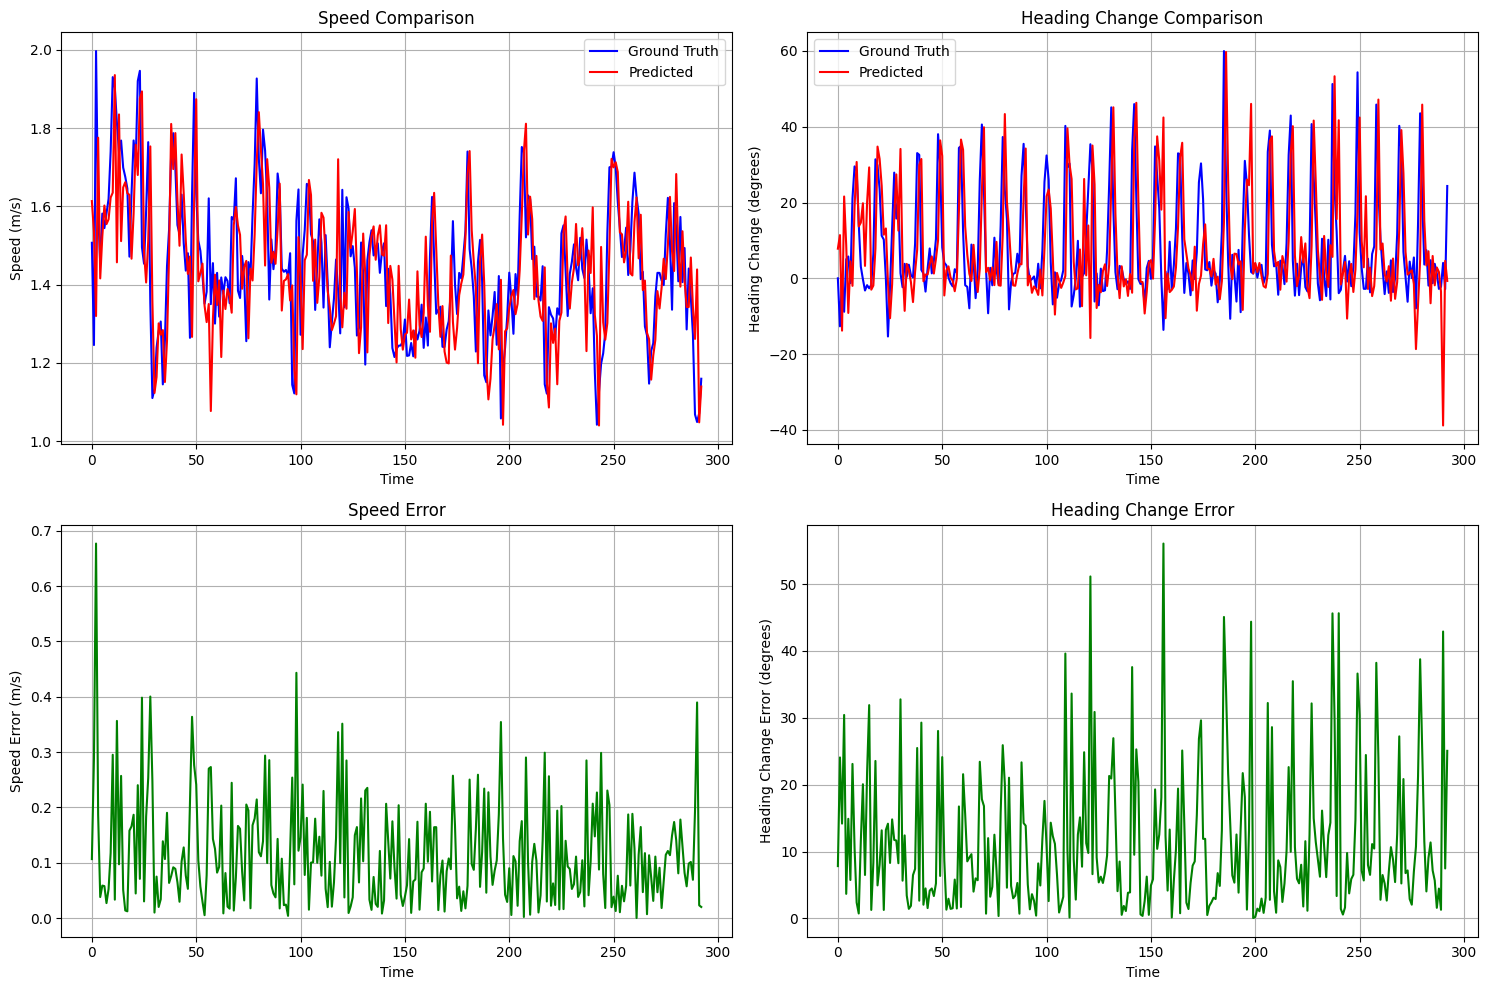

2025-04-10 21:17:27 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_swing5m_02.csv
2025-04-10 21:17:27 - INFO - CSV 파일 로딩 완료: 15291 행
2025-04-10 21:17:27 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:17:27 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:17:27 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:17:27 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:17:27 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.1159 m/s
Mean Heading Change Error: 11.4516 degrees

학습에 사용된 파일 처리 중: Soccer_swing5m_02.csv


2025-04-10 21:17:55 - INFO - ENU 좌표 변환 완료
2025-04-10 21:17:55 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:17:55 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:17:55 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:17:55 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:17:55 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:17:55 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:17:55 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:17:55 - INFO - 전체 전처리 완료


10/10 [==============================] - 0s 7ms/step


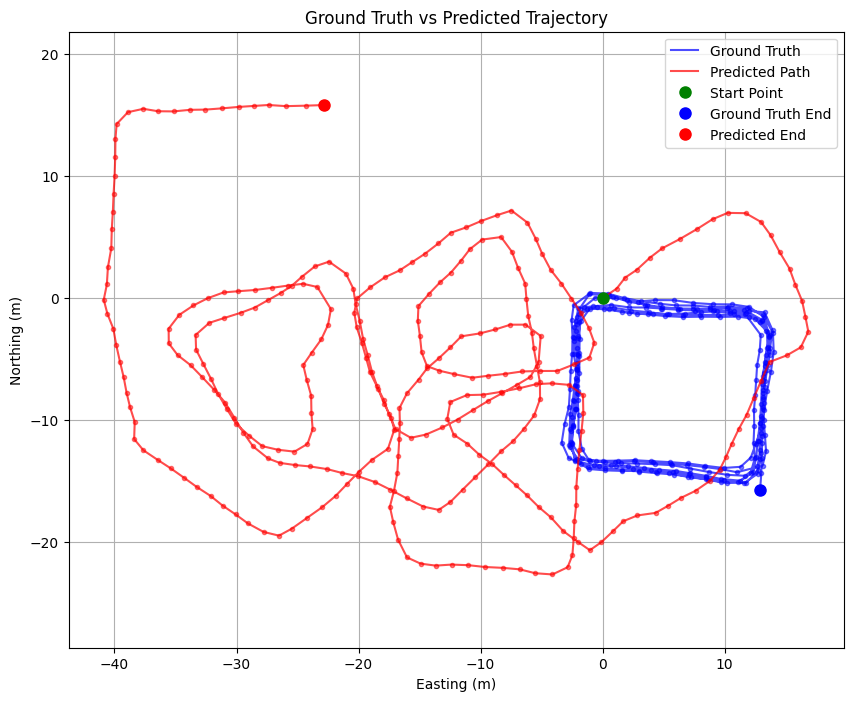

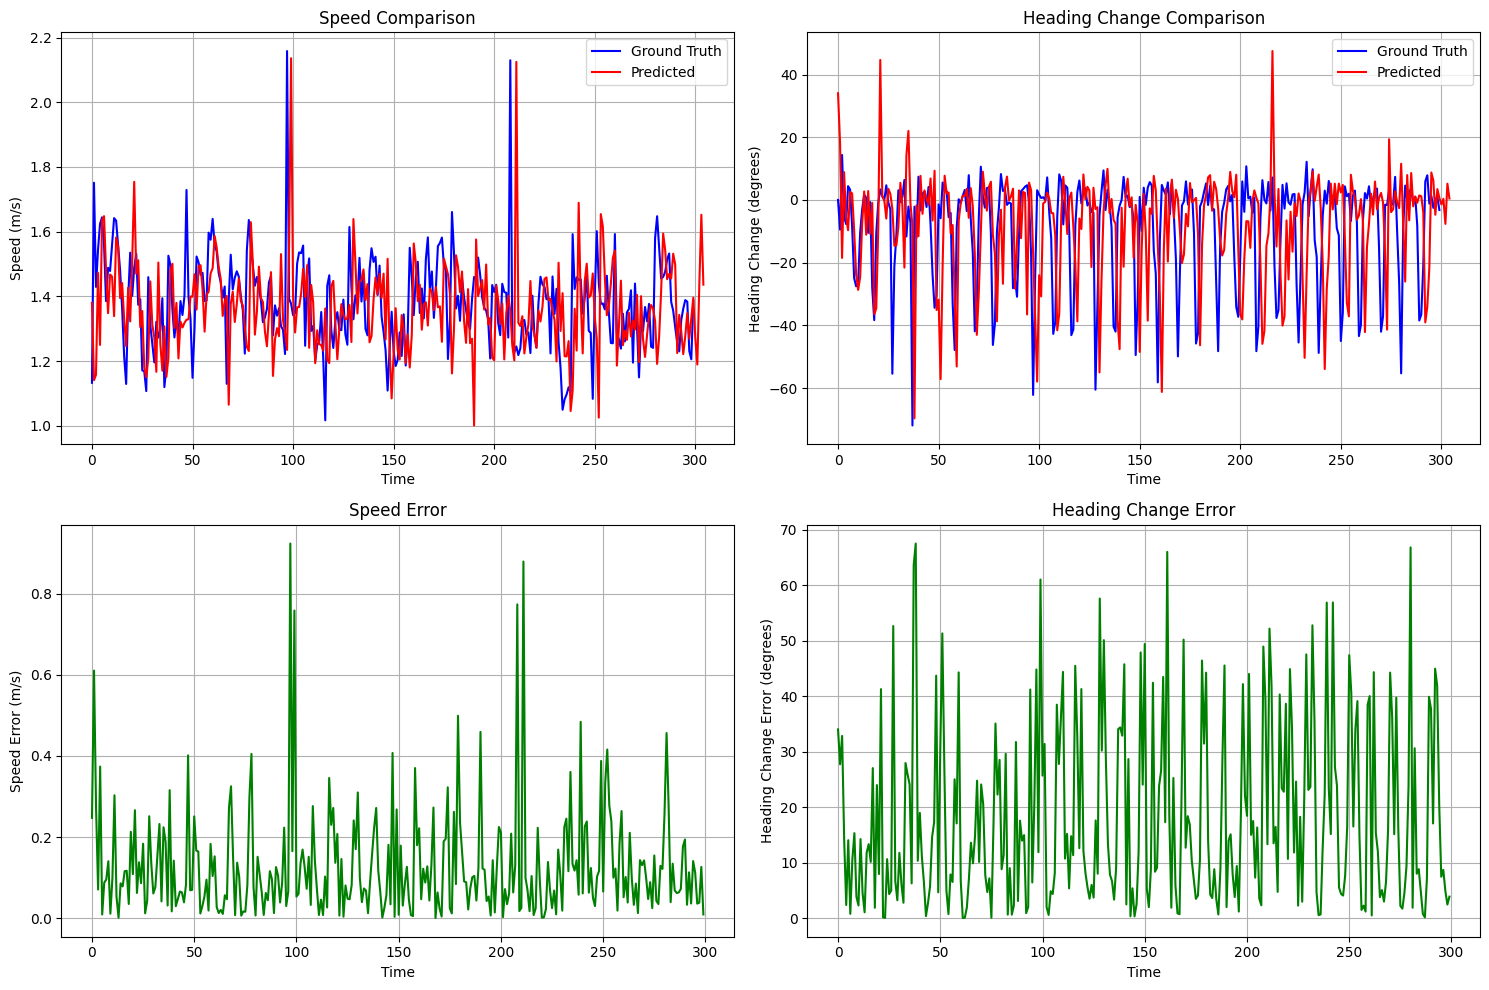

2025-04-10 21:17:55 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\learn_data\Soccer_swing5m_03.csv
2025-04-10 21:17:55 - INFO - CSV 파일 로딩 완료: 14744 행
2025-04-10 21:17:55 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:17:55 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:17:55 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:17:55 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:17:55 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.1284 m/s
Mean Heading Change Error: 18.2252 degrees

학습에 사용된 파일 처리 중: Soccer_swing5m_03.csv


2025-04-10 21:18:22 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:22 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:22 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:22 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:22 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:22 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:22 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:22 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:22 - INFO - 전체 전처리 완료


10/10 [==============================] - 0s 7ms/step


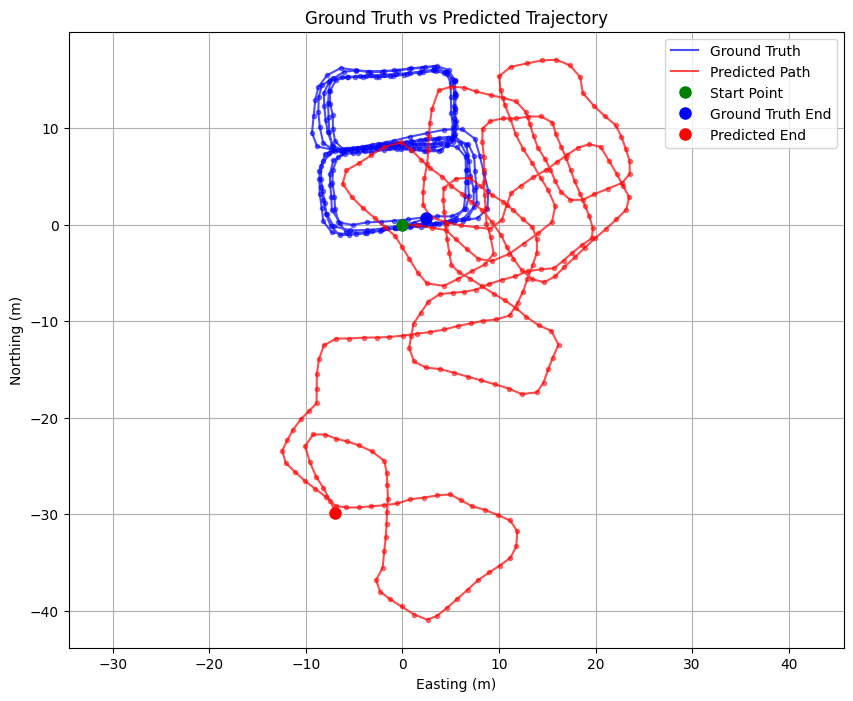

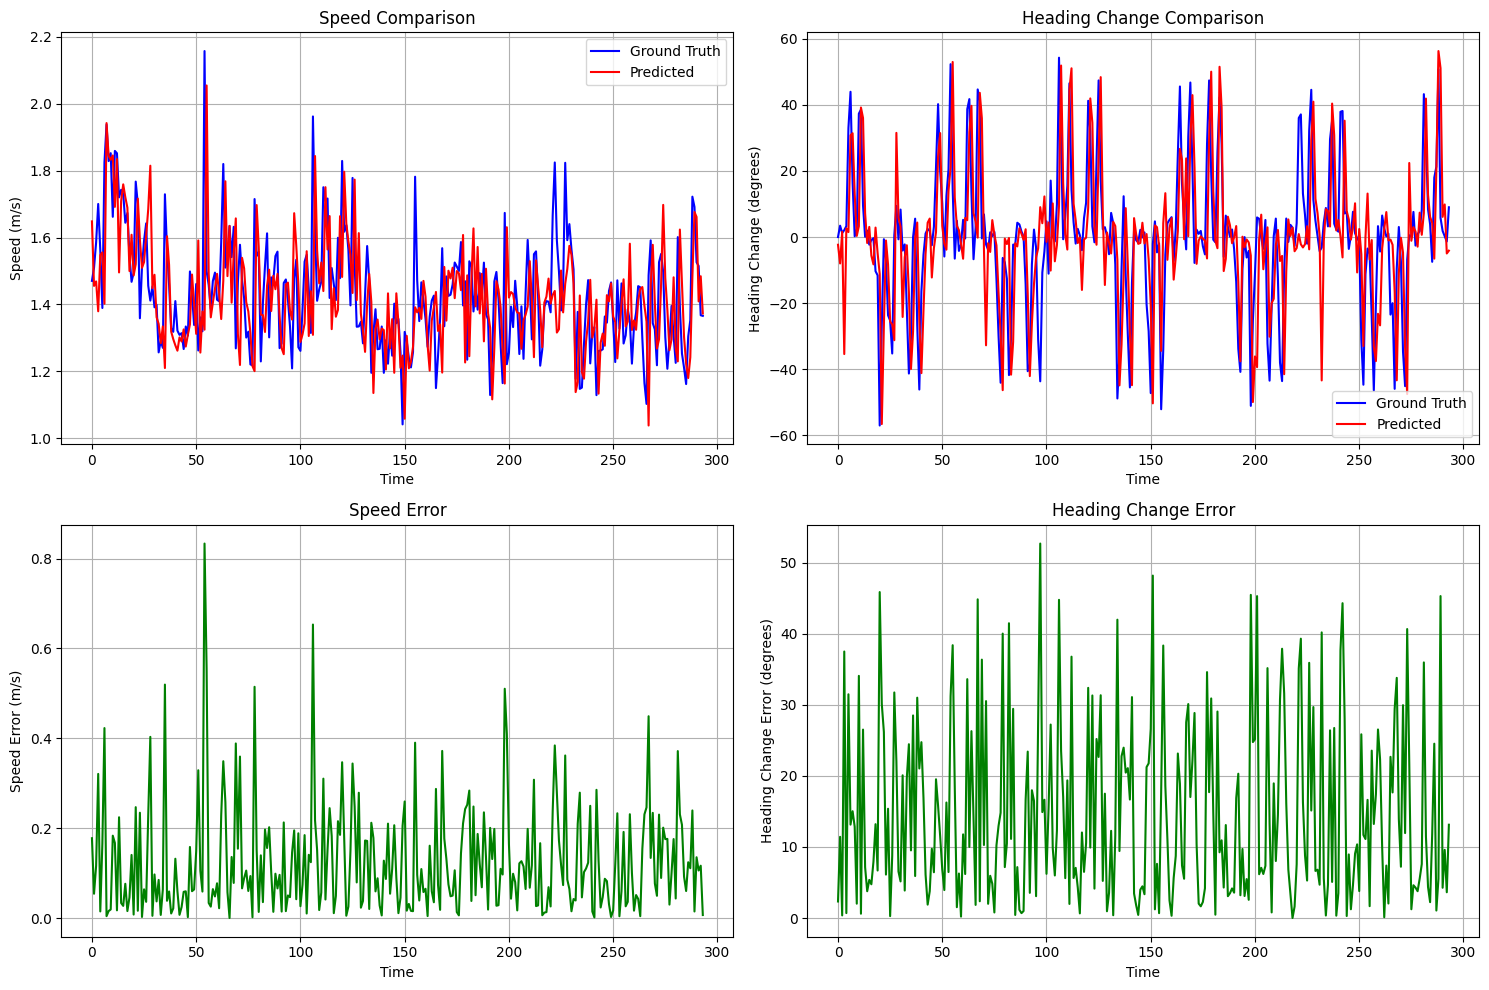

2025-04-10 21:18:22 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_1.csv
2025-04-10 21:18:22 - INFO - CSV 파일 로딩 완료: 2590 행
2025-04-10 21:18:22 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:22 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:22 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:22 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:22 - INFO - ENU 좌표 변환 시작


Mean Speed Error: 0.1272 m/s
Mean Heading Change Error: 14.6367 degrees

테스트 파일 처리 중: 3f_1.csv


2025-04-10 21:18:27 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:27 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:27 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:27 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:27 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:27 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:27 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:27 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:27 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 7ms/step


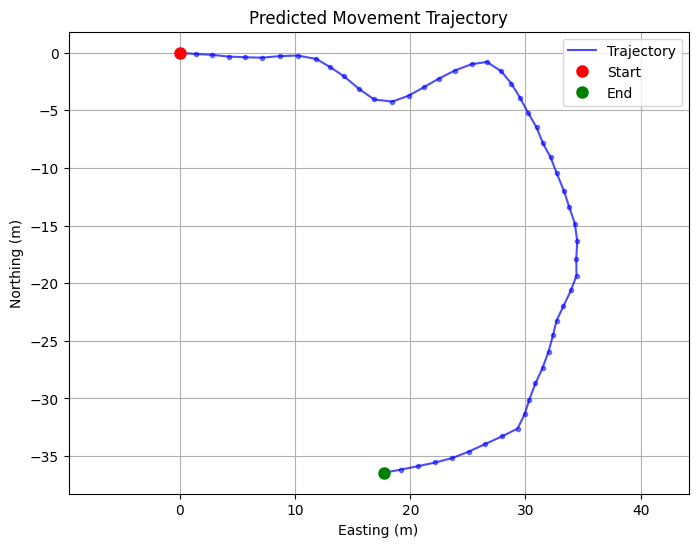

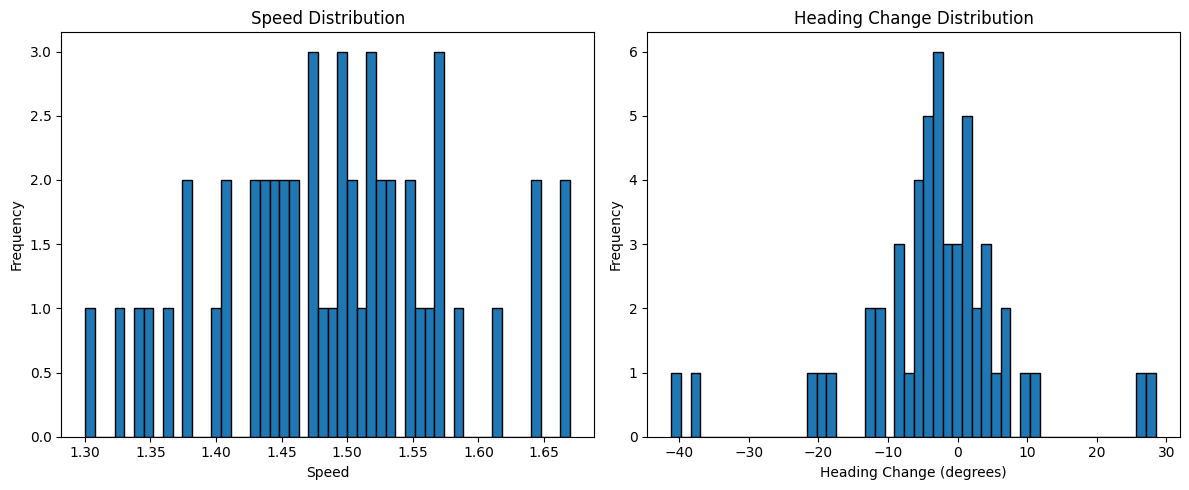

2025-04-10 21:18:28 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_2.csv
2025-04-10 21:18:28 - INFO - CSV 파일 로딩 완료: 2618 행
2025-04-10 21:18:28 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:28 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:28 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:28 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:28 - INFO - ENU 좌표 변환 시작



테스트 파일 처리 중: 3f_2.csv


2025-04-10 21:18:32 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:32 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:32 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:32 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:32 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:32 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:32 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:32 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:32 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 8ms/step


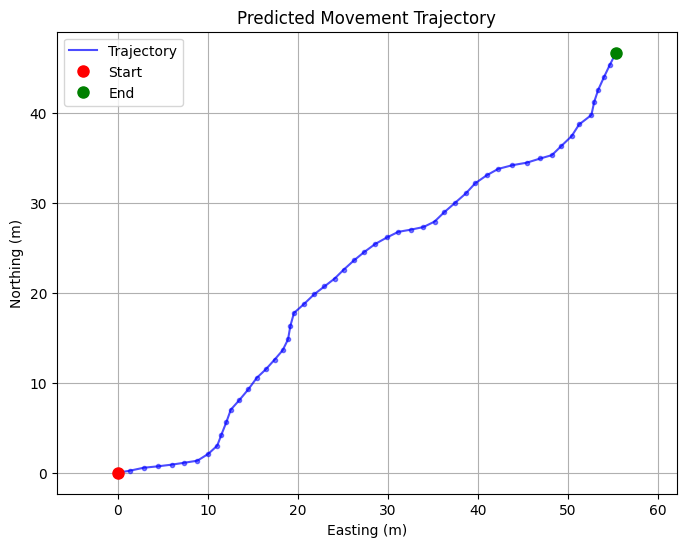

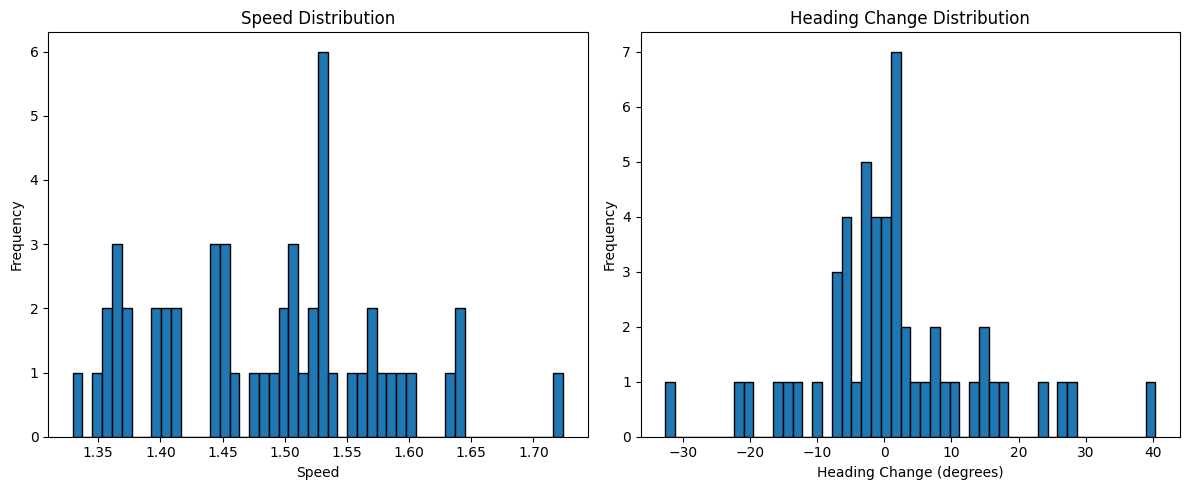

2025-04-10 21:18:33 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_swing1.csv
2025-04-10 21:18:33 - INFO - CSV 파일 로딩 완료: 2699 행
2025-04-10 21:18:33 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:33 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:33 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:33 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:33 - INFO - ENU 좌표 변환 시작



테스트 파일 처리 중: 3f_swing1.csv


2025-04-10 21:18:37 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:37 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:37 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:37 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:37 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:37 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:37 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:37 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:37 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 7ms/step


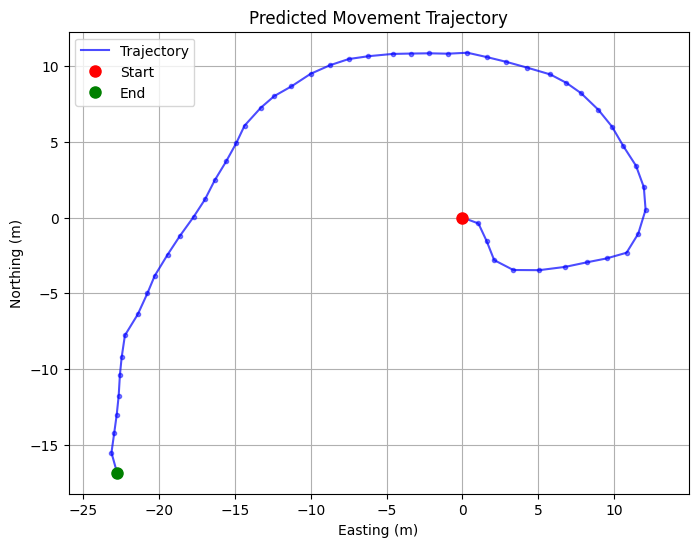

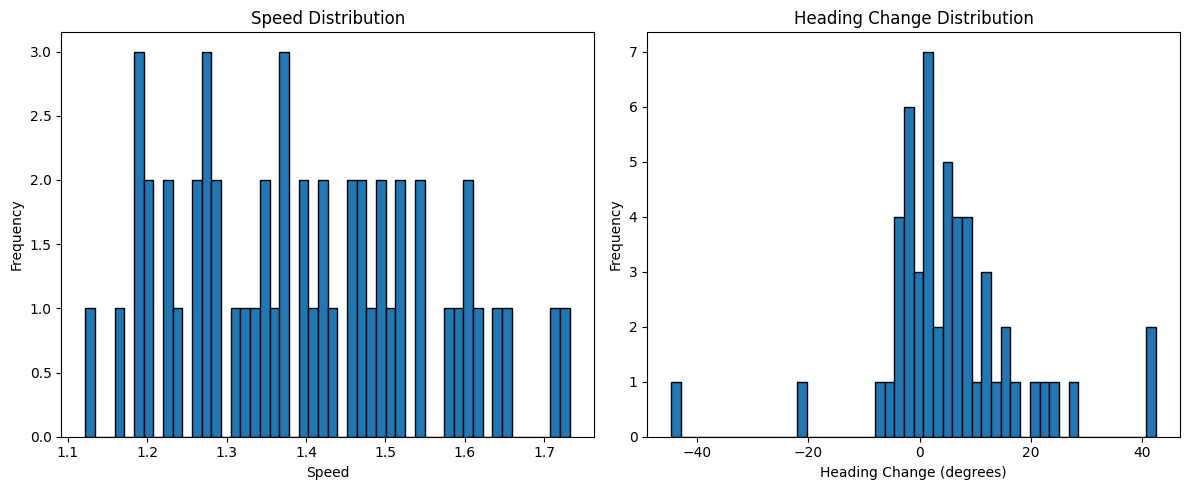

2025-04-10 21:18:38 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_swing2.csv
2025-04-10 21:18:38 - INFO - CSV 파일 로딩 완료: 2683 행
2025-04-10 21:18:38 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:38 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:38 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:38 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:38 - INFO - ENU 좌표 변환 시작



테스트 파일 처리 중: 3f_swing2.csv


2025-04-10 21:18:43 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:43 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:43 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:43 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:43 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:43 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:43 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:43 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:43 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 11ms/step


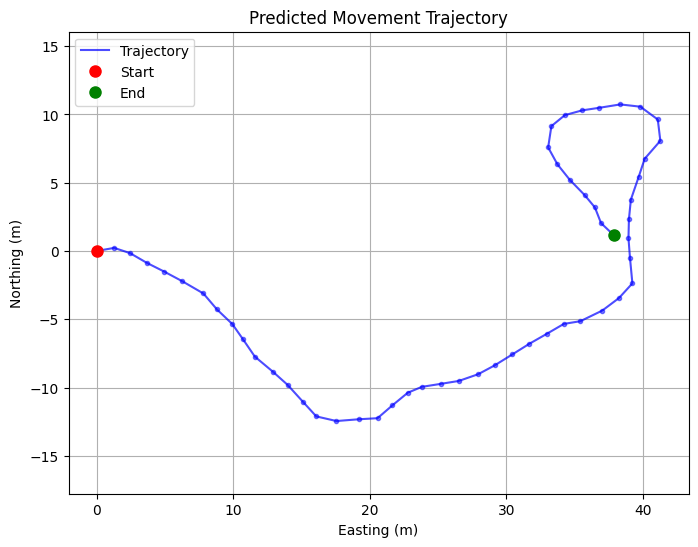

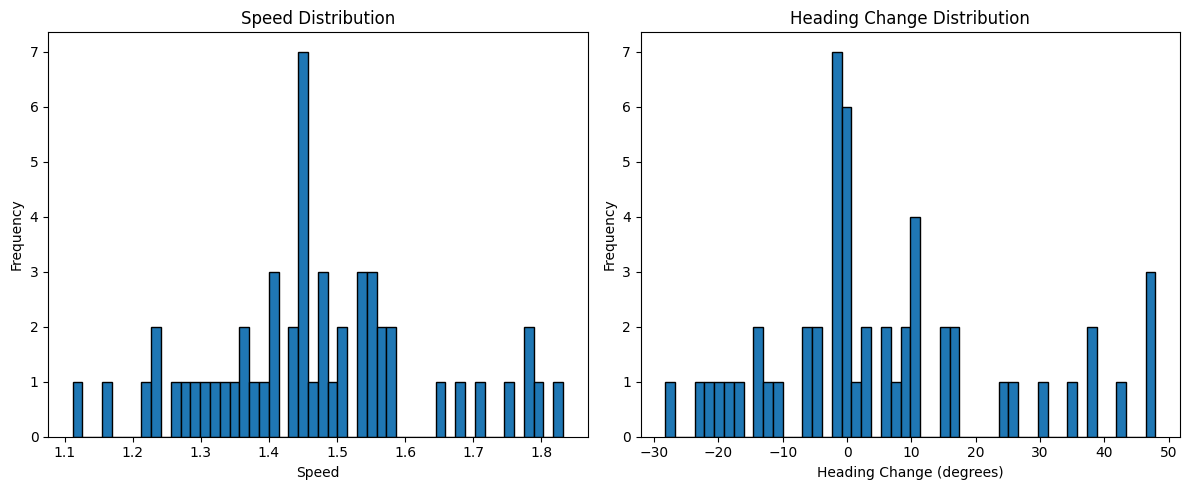

2025-04-10 21:18:43 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_looking01.csv
2025-04-10 21:18:43 - INFO - CSV 파일 로딩 완료: 2515 행
2025-04-10 21:18:43 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:43 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:43 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:43 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:43 - INFO - ENU 좌표 변환 시작



테스트 파일 처리 중: 3f_looking01.csv


2025-04-10 21:18:48 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:48 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:48 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:48 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:48 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:48 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:48 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:48 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:48 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 8ms/step


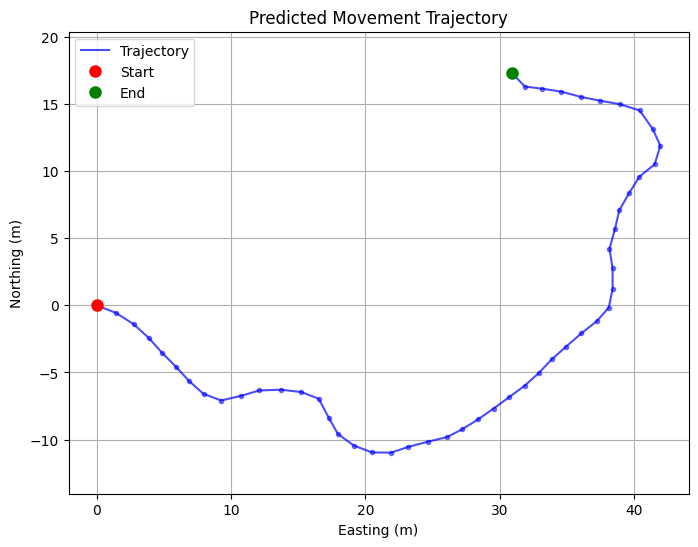

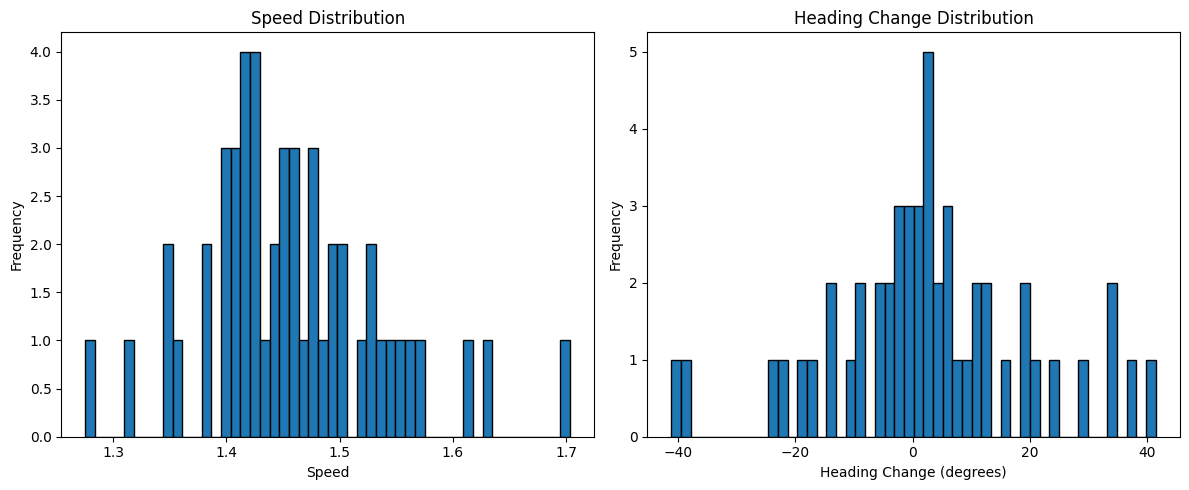

2025-04-10 21:18:48 - INFO - CSV 파일 로딩 시작: c:\Users\kimbo\NNL\AI-PDR_GPS-GT\data\test_data\3f_looking02.csv
2025-04-10 21:18:48 - INFO - CSV 파일 로딩 완료: 2726 행
2025-04-10 21:18:48 - INFO - 컬럼 이름 재정의 완료
2025-04-10 21:18:48 - INFO - 시간 데이터 전처리 시작
2025-04-10 21:18:48 - INFO - 시간 데이터 전처리 완료
2025-04-10 21:18:48 - INFO - GPS 데이터 전처리 시작
2025-04-10 21:18:48 - INFO - ENU 좌표 변환 시작



테스트 파일 처리 중: 3f_looking02.csv


2025-04-10 21:18:53 - INFO - ENU 좌표 변환 완료
2025-04-10 21:18:53 - INFO - GPS 데이터 전처리 완료
2025-04-10 21:18:53 - INFO - 가속도 벡터 크기 계산 시작
2025-04-10 21:18:53 - INFO - 가속도 벡터 크기 계산 완료
2025-04-10 21:18:53 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:53 - INFO - 속도 및 헤딩 계산 시작
2025-04-10 21:18:53 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:53 - INFO - 속도 및 헤딩 계산 완료
2025-04-10 21:18:53 - INFO - 전체 전처리 완료


2/2 [==============================] - 0s 8ms/step


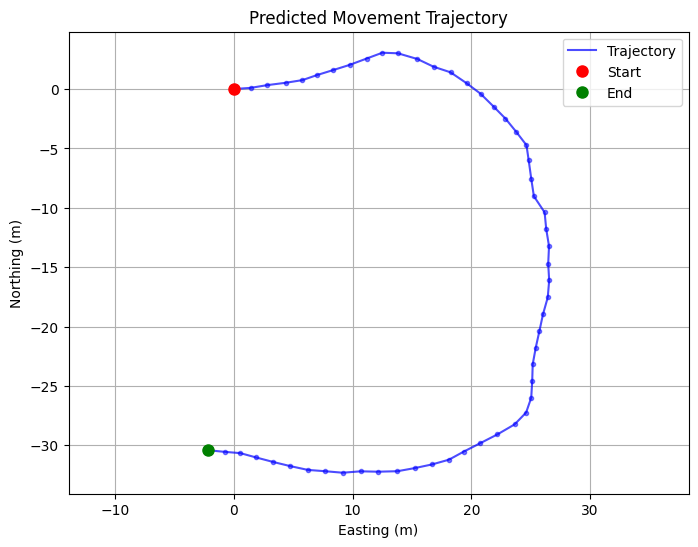

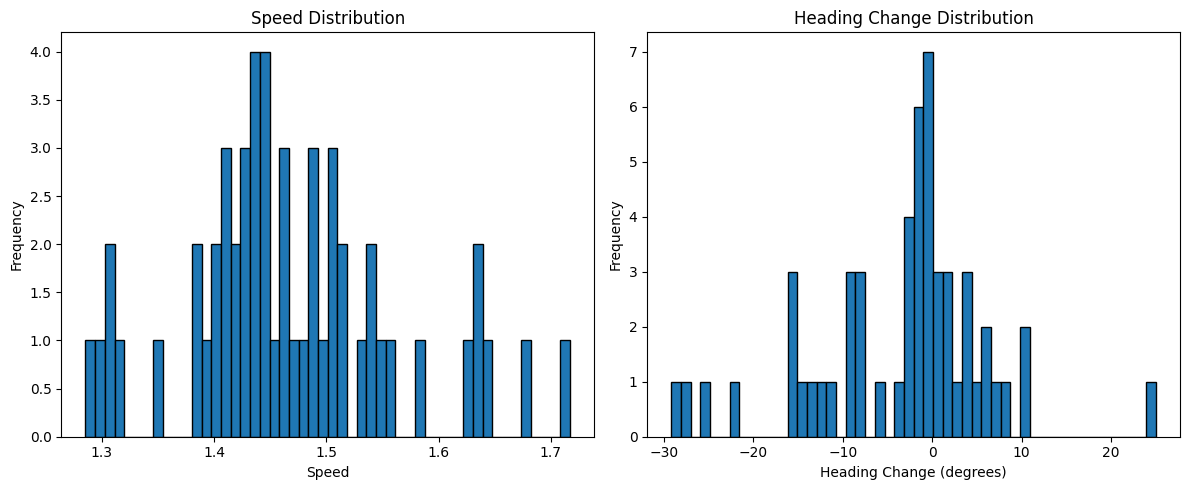

In [1]:
import os
import numpy as np
from src.data_processor import DataProcessor
from src.model_trainer import ModelTrainer
from src.trajectory_predictor import TrajectoryPredictor
import matplotlib.pyplot as plt
import joblib 

def main():
    # 현재 파일의 디렉토리를 기준으로 프로젝트 루트 경로 설정
    BASE_DIR = os.getcwd()
    
    # 저장된 모델과 스케일러 경로 설정
    model_path = os.path.join(BASE_DIR, 'saved_models', 'model_20250410_211351.h5')
    scaler_path = os.path.join(BASE_DIR, 'saved_models', 'scalers_20250410_211351.joblib')
    
    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        print("학습된 모델이나 스케일러를 찾을 수 없습니다. 먼저 모델을 학습해주세요.")
        return
    
    # ModelTrainer 인스턴스 생성
    trainer = ModelTrainer(window_size=50, num_features=9)
    
    # 스케일러 로드
    scalers = joblib.load(scaler_path)
    trainer.scaler_acc = scalers['scaler_acc']
    trainer.scaler_gyro = scalers['scaler_gyro']
    
    # 모델 로드
    trainer.model = trainer.load_model(model_path)
    
    # TrajectoryPredictor 인스턴스 생성 (스케일러 전달)
    predictor = TrajectoryPredictor(
        trainer.model, 
        trainer.scaler_acc, 
        trainer.scaler_gyro, 
    )
    
    # 학습 데이터 경로
    learn_data_paths = [
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Basket_1.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Basket_2.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking1.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking3.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking4.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing1.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing2.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing3.csv'),
        # os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing4.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_01.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_02.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_03.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_01.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_02.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_03.csv')
    ]
      
    # TrajectoryPredictor 인스턴스 생성
    predictor = TrajectoryPredictor(trainer.model, trainer.scaler_acc, trainer.scaler_gyro)
    
    # 각 학습 데이터 파일에 대해 다시 예측 수행
    for learn_data_path in learn_data_paths:
        if os.path.exists(learn_data_path):
            print(f"\n학습에 사용된 파일 처리 중: {os.path.basename(learn_data_path)}")
            
            # 학습에 사용된 데이터 로드 및 전처리
            df_learned = DataProcessor.load_and_preprocess_csv(learn_data_path, skiprows=300)
            
            # 예측 경로 시각화
            predictor.compare_trajectories(df_learned)
            
            # 그래프 표시
            plt.show()
            
        else:
            print(f"파일을 찾을 수 없습니다: {learn_data_path}")
    
    # 테스트 데이터 경로
    test_paths = [
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_1.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_2.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing1.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing2.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking01.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking02.csv')
    ]
    
    # 각 테스트 파일에 대해 예측 수행
    for test_path in test_paths:
        if os.path.exists(test_path):
            print(f"\n테스트 파일 처리 중: {os.path.basename(test_path)}")
            
            # 테스트 데이터 로드 및 전처리
            df_test = DataProcessor.load_and_preprocess_csv(test_path, skiprows=50)
            
            # 예측 경로 시각화
            predictor.predict_and_plot_trajectory(df_test)
            
            # 그래프 표시
            plt.show()
            
        else:
            print(f"테스트 파일을 찾을 수 없습니다: {test_path}")

if __name__ == '__main__':
    main() 